## **KONVERSI PANDAS DATAFRAME**

In [ ]:
import os
os.listdir('sample_data')

['README.md',
 'anscombe.json',
 'california_housing_train.csv',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_test.csv']

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('sample_data/california_housing_train.csv')
df.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  ho

## **Data Preparation dengan Teknik One Hot Encoding**

Umumnya, model machine learning tidak dapat mengolah data kategorik, sehingga kita perlu melakukan konversi data kategorik menjadi data numerik. Banyak model machine learning seperti Regresi Linear dan Support Vector Machine (kedua model ini akan dibahas pada modul-modul selanjutnya) yang hanya menerima input numerik sehingga tidak bisa memproses data kategorik. Salah satu teknik untuk mengubah data kategorik menjadi data numerik adalah dengan menggunakan One Hot Encoding atau yang juga dikenal sebagai dummy variables. One Hot Encoding mengubah data kategorik dengan membuat kolom baru untuk setiap kategori seperti gambar di bawah.

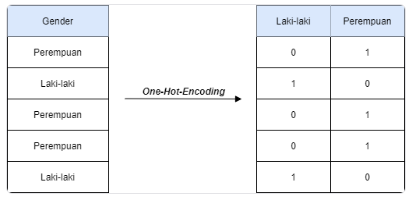

## **Data Preparation dengan Normalization dan Standardization**

**Outlier Removal**

Dalam statistik, outlier adalah sebuah nilai yang jauh berbeda dari kumpulan nilai lainnya dan dapat mengacaukan hasil dari sebuah analisis statistik. Outlier dapat disebabkan oleh kesalahan dalam pengumpulan data atau nilai tersebut benar ada dan memang unik dari kumpulan nilai lainnya.

Apa pun alasan kemunculannya, Anda perlu tahu cara mengidentifikasi dan memproses outlier. Ini adalah bagian penting dalam persiapan data di dalam machine learning. Salah satu cara termudah untuk mengecek apakah terdapat outlier dalam data kita adalah dengan melakukan visualisasi.

Berikut adalah contoh visualisasi terhadap data yang memiliki outlier.

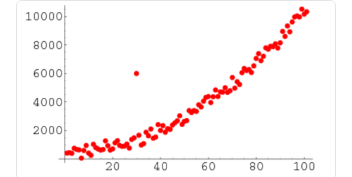

**Normalization**


Normalization adalah salah satu teknik yang dipakai dalam data preparation. Tujuan dari normalisasi adalah mengubah nilai-nilai dari sebuah fitur ke dalam skala yang sama. Normalization memungkinkan kenaikan performa dan stabilitas dari sebuah model machine learning.



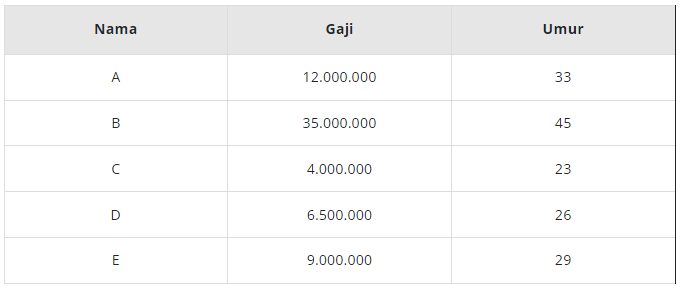

Contoh dari normalization adalah ketika kita memiliki dataset seperti di atas yang memiliki fitur umur dengan skala 23 sampai 45 tahun dan fitur gaji dengan skala 4.000.000 sampai 35.000.000. Di sini kita melihat bahwa fitur gaji sekitar satu juta kali lebih besar dari fitur umur dan menunjukkan kedua fitur ini berada pada skala yang sangat jauh berbeda.

Ketika membangun model seperti regresi linear, fitur gaji akan sangat mempengaruhi prediksi dari model karena nilainya yang jauh lebih besar daripada umur, walaupun tidak berarti fitur tersebut jauh lebih penting dari fitur umur.

Salah satu contoh dari normalization adalah min-max scaling di mana nilai-nilai dipetakan ke dalam skala 0 sampai 1. SKLearn menyediakan library untuk normalization

Pada Colab kita Import library MinMaxScaler dan masukkan data dari tabel sebelumnya.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]

Pada cell selanjutnya kita buat sebuah objek MinMaxScaler dan panggil fungsi fit() dan mengisi argumen data seperti potongan kode di bawah. Fungsi fit() dari objek MinMaxScaler adalah fungsi untuk menghitung nilai minimum dan maksimum pada tiap kolom.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [ ]:
print(scaler.transform(data))

[[0.25806452 0.45454545]
 [1.         1.        ]
 [0.         0.        ]
 [0.08064516 0.13636364]
 [0.16129032 0.27272727]]


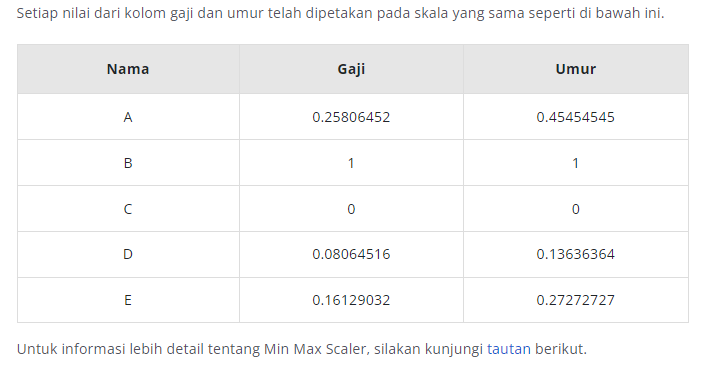

**Standardization**

Standardization adalah proses konversi nilai-nilai dari suatu fitur sehingga nilai-nilai tersebut memiliki skala yang sama. Z score adalah metode paling populer untuk standardisasi di mana setiap nilai pada sebuah atribut numerik akan dikurangi dengan rata-rata dan dibagi dengan standar deviasi dari seluruh nilai pada sebuah kolom atribut.



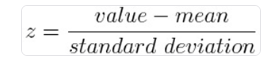

In [ ]:
from sklearn import preprocessing
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]


In [ ]:
scaler = preprocessing.StandardScaler().fit(data)

In [ ]:
data = scaler.transform(data)
data

array([[-0.11638732,  0.23521877],
       [ 1.94277296,  1.80334389],
       [-0.83261698, -1.07155217],
       [-0.60879521, -0.67952089],
       [-0.38497344, -0.28748961]])

## **DataSets dan Training Set dan Test Set**

**Datasets**


Dataset yang telah dibersihkan dan diproses kemudian siap kita latih dengan machine learning. Satu-satunya cara untuk mengetahui apakah model machine learning kita bagus atau tidak adalah dengan mengujinya pada kasus atau data baru yang belum dikenali oleh model. Kita bisa saja membuat model dan langsung mengujinya pada tahap produksi lalu memonitor kualitasnya. Tapi jika ternyata model yang kita kembangkan bekerja dengan buruk, pelanggan dan klien kita akan komplain. Selain itu, cara ini tentu akan memakan sumber daya dan biaya yang lebih besar.



**Training Set dan Test Set**

Pilihan yang lebih baik adalah dengan membagi dataset menjadi 2 bagian yaitu data training dan data testing. Berikut adalah gambaran bagaimana total data pada dataset dibagi menjadi dua bagian: train set dan test set.

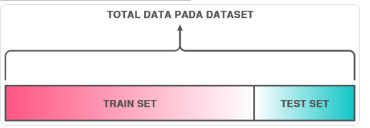

Dengan demikian, kita bisa melakukan pelatihan model pada train set, kemudian mengujinya pada test set --sekumpulan data yang belum dikenali model. Ingat bahwa membandingkan hasil prediksi dengan label sebenarnya dalam test set merupakan proses evaluasi performa model. Dengan menguji model terhadap data testing, kita dapat melihat kesalahan yang dibuat dan memperbaikinya sebelum mulai membawa model kita ke tahap produksi.

Penting untuk kita memilih rasio yang sesuai dalam pembagian dataset. Saat membagi dataset, kita perlu membuat informasi pada kedua bagian tetap berimbang. Kita tidak ingin mengalokasikan terlalu banyak informasi pada data testing agar algoritma ML dapat belajar dengan baik pada data training. Tetapi, jika alokasi data pada data testing terlalu kecil, kita tidak bisa mendapatkan estimasi performa model yang akurat.

Data testing diambil dengan proporsi tertentu. Pada praktiknya, pembagian data training dan data testing yang paling umum adalah 80:20, 70:30, atau 60:40, tergantung dari ukuran atau jumlah data. Namun, untuk dataset berukuran besar, proporsi pembagian 90:10 atau 99:1 juga umum dilakukan. Misal jika ukuran dataset sangat besar berisi lebih dari 1 juta record, maka kita dapat mengambil sekitar 10 ribu data saja untuk testing alias sebesar 1% saja.

Pada modul ini, kita akan belajar membagi dataset dengan fungsi train_test_split dari library sklearn. Perhatikan contoh kode berikut.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1 )

NameError: name 'X' is not defined

Dengan fungsi train_test_split dari library sklearn, kita membagi array X dan y ke dalam 20% data testing (test_size=0.2 ). Misal total dataset A yang kita miliki adalah 1000 record, dengan test_size=0.2, maka data testing kita berjumlah 200 record dan jumlah data training sebesar 800 (80%).

Sebelum proses pemisahan, fungsi train_test_split telah mengacak dataset secara internal terlebih dahulu. Jika tidak, data testing hanya akan berisi semua data pada kelas tertentu saja. Misal dataset A kita terdiri dari 5 kelas dengan jumlah masing-masing kelas sebesar 200 record, maka dengan proses shuffling sebelum pemisahan, data testing akan memiliki data dari 5 kelas yang ada. Tanpa proses shuffling, seluruh data dari kelas 1 - 4 akan berakhir di set data training, dan data testing hanya berisi data dari kelas 5 saja. Proses shuffling menjaga rasio informasi pada data training dan testing tetap berimbang.

Melalui parameter random_state, fungsi train_test_split menyediakan random seed yang tetap untuk internal pseudo-random generator yang digunakan pada proses shuffling. Umumnya, nilai yang digunakan adalah 0, atau 1, atau ada juga yang menggunakan 42. Menentukan parameter random_state bertujuan untuk dapat memastikan bahwa hasil pembagian dataset konsisten dan memberikan data yang sama setiap kali model dijalankan. Jika tidak ditentukan, maka tiap kali melakukan split, kita akan mendapatkan data train dan tes berbeda, yang juga akan membuat akurasi model ML menjadi berbeda tiap kali di-run.  

Berikut adalah contoh kode untuk memahami bagaimana penentuan random_state bekerja pada dataset.

In [ ]:
from sklearn.model_selection import train_test_split

X_data = range(10)
y_data = range(10)

print("random_state ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)
    print(y_test)


print("random_state tidak ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = None)
    print(y_test)


random_state ditentukan
[8, 1, 5]
[8, 1, 5]
[8, 1, 5]
random_state tidak ditentukan
[1, 5, 4]
[6, 5, 8]
[3, 1, 9]


**LATIHAN**

In [ ]:
import sklearn
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

NameError: name 'datasets' is not defined

In [ ]:
# pisahkan atribut dan label pada iris dataset
x=iris.data
y=iris.target

Untuk membuat train set dan test set kita tinggal memanggil fungsi train_test_split. Train_test_split memiliki parameter x yaitu atribut dari dataset, y yaitu target dari dataset, dan test_size yaitu persentase test set dari dataset utuh. Train_test_split mengembalikan 4 nilai yaitu, atribut dari train set, atribut dari test set, target dari train set, dan target dari test set

In [ ]:
from sklearn.model_selection import train_test_split

# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


# menghitung panjang/jumlah data pada x_test
len(x_test)

30

Ketika kita print panjang dari x_test, kita bisa melihat bahwa panjang dari atribut test set adalah 30 sampel, sesuai dengan parameter yang kita masukkan pada fungsi train_test_split yaitu 0.2 atau 20% dari 150 sampel. Kode untuk print panjang dari x_test seperti di bawah ini.

## **DATA EVALUATION**

Sekarang bayangkan ketika kita bertugas untuk mengembangkan sebuah proyek ML. Kita bimbang kala memilih model yang akan dipakai dari 10 jenis model yang tersedia. Salah satu opsinya adalah dengan melatih semua model tersebut lalu membandingkan tingkat erornya pada test set. Setelah membandingkan performa semua model, Anda mendapati model regresi linier memiliki tingkat eror yang paling kecil katakanlah sebesar 5%. Anda lalu membawa model tersebut ke tahap produksi.

Kemudian ketika model diuji pada tahap produksi, tingkat eror ternyata sebesar 15%. Kenapa ini terjadi? Masalah ini disebabkan karena kita mengukur tingkat eror berulang kali pada test set. Kita secara tidak sadar telah memilih model yang hanya bekerja dengan baik pada test set tersebut. Hal ini menyebabkan model tidak bekerja dengan baik ketika menemui data baru. Solusi paling umum dari masalah ini adalah dengan menambahkan validation set pada model machine learning.



**Train, Test, Validation Set**

Validation set atau holdout validation adalah bagian dari train set yang dipakai untuk pengujian model pada tahap awal. Secara sederhana, kita menguji beberapa model dengan hyperparameter yang berbeda pada data training yang telah dikurangi data untuk validation. Lalu kita pilih model serta hyperparameter yang bekerja paling baik pada validation set. Setelah proses pengujian pada holdout validation, kita bisa melatih model menggunakan data training yang utuh (data training termasuk data validation) untuk mendapatkan model final. Terakhir kita mengevaluasi model final pada test set untuk melihat tingkat erornya.

2021012013541085a98775389de3594ee46c6ba619cb17.png

Dalam menggunakan holdout validation, ada beberapa hal yang harus dipertimbangkan. Jika ukuran validation set-nya terlalu kecil, maka ada kemungkinan kita memilih model yang tidak optimal. Sebaliknya, ketika ukurannya terlalu besar, maka sisa data pada train set lebih kecil dari data train set utuh. Kondisi ini tentu tidak ideal untuk membandingkan model yang berbeda pada data training yang lebih kecil. Solusi untuk masalah ini adalah dengan menggunakan Cross Validation.



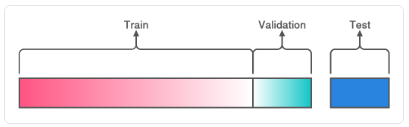

**Cross Validation**

K-Fold Cross Validation atau lebih sering disebut cross validation adalah salah satu teknik yang populer dipakai dalam evaluasi model ML. Pada cross validation dataset dibagi sebanyak K lipatan. Pada setiap iterasi setiap lipatan akan dipakai satu kali sebagai data uji dan lipatan sisanya dipakai sebagai data latih. Dengan menggunakan cross validation kita akan memperoleh hasil evaluasi yang lebih akurat karena model dievaluasi dengan seluruh data. Berikut adalah ilustrasi dari K-cross validation.



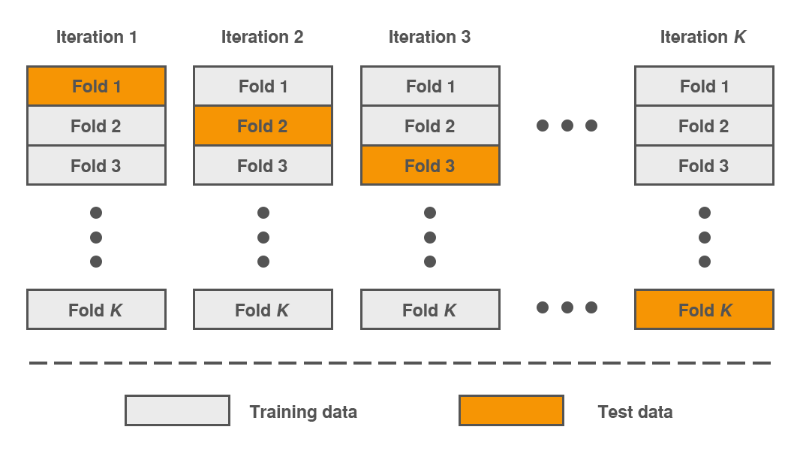

**Latihan**

In [ ]:
import sklearn
from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()


In [ ]:
import pandas as pd

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Menambahkan kolom target ke DataFrame
iris_df['target'] = iris.target

# Menampilkan beberapa baris pertama dari DataFrame
print(iris_df.head())


AttributeError: 'DataFrame' object has no attribute 'data'

In [ ]:
# mendefinisikan atribut dan label pada dataset
x=iris.data
y=iris.target

Kita akan membuat model machine learning pertama kita yaitu decision tree, menggunakan library scikit learn. Model machine learning juga sering disebut sebagai classifier. Lebih lanjut, variabel clf adalah singkatan dari classifier.

In [ ]:
from sklearn import tree

# membuat model dengan decision tree classifier
clf = tree.DecisionTreeClassifier()

Setelah dataset dan model siap, kita bisa menggunakan cross validation untuk mengevaluasi performa dari model machine learning. Fungsi cross_val_score() seperti di bawah menerima 4 parameter yaitu, ‘clf’ yang merupakan model machine learning, ‘X’ yang merupakan atribut dari dataset, ‘y’ yang merupakan label dari dataset, dan ‘cv’ yang merupakan jumlah fold yang akan dipakai pada cross validation.

In [ ]:
from sklearn.model_selection import cross_val_score

# mengevaluasi performa model dengan cross_val_score
scores = cross_val_score(clf, x, y, cv=5)

Cross_val_score mengembalikan nilai berupa larik atau array yang terdiri dari akurasi pengujian setiap fold dari dataset. Untuk mencetak dan mengetahui hasilnya, tambahkan kode scores di bawah kode sebelumnya. Tampilannya seperti gambar di bawah ini.


Elemen pertama dari larik menunjukkan nilai 0.96666 yang berarti ketika fold pertama dijadikan validation set dan fold lainnya dijadikan train set, hasil dari pengujian tersebut adalah akurasi sebesar 0.96666.

Melihat akurasi dari seluruh pengujian fold yang memiliki nilai tinggi dan konsisten pada tiap fold, kita mendapatkan gambaran bahwa model kita memiliki performa yang sangat baik.

Secara umum jika hasil dari pengujian tiap fold pada cross validation memiliki nilai yang bervariasi dari 0.85 sampai 0.99, maka model tersebut dapat dikatakan baik.





## **LATIHAN SKLearn D.Tree**

In [ ]:
import pandas as pd

iris = pd.read_csv('Iris.csv')

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.drop('Id',axis=1,inplace=True)

In [ ]:
# memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']


In [ ]:

# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# membuat model Decision Tree
tree_model = DecisionTreeClassifier()

# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

Setelah model dilatih, uji model menggunakan data uji untuk melihat seberapa baik model yang telah kita buat. Pengujian model ini bisa dilakukan dengan menggunakan fungsi predict().

Berikutnya, gunakan metrik akurasi untuk melihat seberapa baik model yang telah kita latih. Penjelasan terkait metrik akurasi ini akan dibahas pada modul selanjutnya.

In [ ]:
# Evaluasi Model
from sklearn.metrics import accuracy_score


y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy:', acc_secore)

Accuracy: 0.933


Nah, kita bisa mencoba model yang telah kita buat untuk memprediksi spesies dari sebuah bunga Iris. Masih ingat bukan, atribut yang menjadi masukan dari model adalah panjang sepal, lebar sepal, panjang petal, dan lebar petal? Kita akan memasukkan nilai yang sesuai dengan format tersebut secara berurutan dalam satuan centimeter. Pada contoh berikut, kita ingin memprediksi spesies dari sebuah bunga iris  yang memiliki panjang sepal 6,2 centimeter, lebar sepal 3,4 centimeter, panjang petal 5,4 centimeter, dan lebar petal 2,3 centimeter.

In [ ]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])


Iris-virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Selain melakukan prediksi, kita juga bisa melihat visualisasi dari decision tree yang kita buat terhadap data menggunakan library Graphviz. Hasil dari graphviz adalah dot file yang akan muncul pada folder file di panel sebelah kiri Google Colab (jika Anda menggunakan Google Colab).

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

Untuk mengunduh berkas iris_tree.dot pada gambar di atas, kita dapat melakukan klik kanan pada berkas tersebut kemudian mengunduhnya.

Jika kita ingin melihat visualisasi decision tree, lakukan konversi dot file ke dalam file png menggunakan situs konversi berkas berikut ini : https://onlineconvertfree.com/converter/images/.

Catatan : Jangan lupa ganti opsi ke images sebelum menekan tombol convert

## **Linear Regression**

Pada latihan kali ini kita akan memprediksi harga rumah berdasarkan jumlah kamar.



In [ ]:
import numpy as np

#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])

#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])


Selanjutnya, kita bisa mencoba menampilkan data tersebut dalam bentuk scatter plot. Jumlah kamar pada sumbu X adalah variabel independen dan harga rumah pada sumbu Y  adalah variabel dependen.

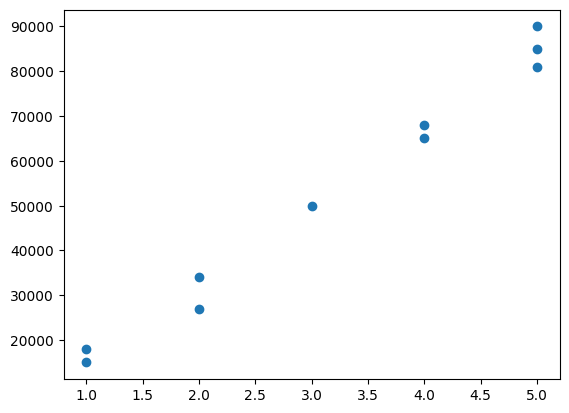

In [ ]:
# menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bedrooms, house_price)

Lalu pada cell berikutnya, kita bisa mulai melatih model kita dengan memanggil fungsi LinearRegression.fit() pada data kita. Fungsi ini untuk melatih model regresi linier dari library SKLearn.

In [ ]:
from sklearn.linear_model import LinearRegression

# latih model dengan Linear Regression.fit()

bedrooms = bedrooms.reshape(-1,1)
linreg = LinearRegression()
linreg.fit(bedrooms,house_price)

LinearRegression()

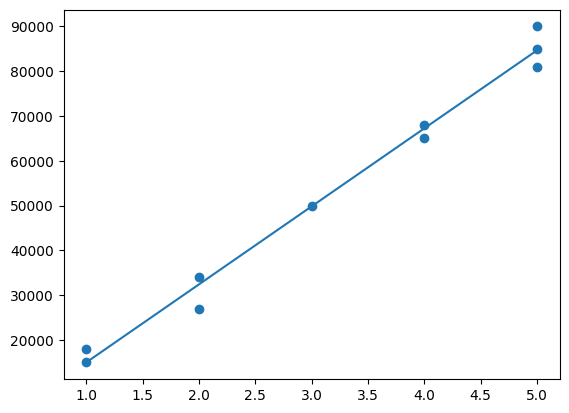

In [ ]:
# menampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))


Model regresi linier adalah salah satu model machine learning yang paling sederhana. Model ini memiliki kompleksitas rendah dan bekerja sangat baik pada dataset yang memiliki hubungan linier. Jadi, ketika Anda menemui masalah yang terlihat memiliki hubungan linier, regresi linier dapat menjadi pilihan pertama sebagai model untuk dikembangkan.

## **SKLearn Logistic Regression**

Pada latihan ini kita akan menggunakan logistic regression untuk memprediksi apakah seseorang akan membeli setelah melihat iklan sebuah produk.



Tahapan Latihan
Tahapan yang dilalui dalam latihan kali ini adalah sebagai berikut:

Ubah dataset menjadi Dataframe.

Hapus kolom 'User ID'.

Pisahkan atribut dan label.

Latih model Logistic Regression.

Evaluasi akurasi model.

In [ ]:
import pandas as pd

df = pd.read_csv('Social_Network_Ads.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# drop kolom yang tidak diperlukan

data = df.drop(columns=['User ID'])

# jalankan proses one-hot encoding dengan pd.get_dummies()

data = pd.get_dummies(data)
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [ ]:
# pisahkan atribut dan label
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased']


Sebelum kita membagi data menjadi train dan test set, kita perlu melakukan standardisasi data seperti yang sudah dijelaskan di modul sebelumnya.



In [ ]:
# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()


,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


Sekarang, kita akan membagi data menjadi train dan test set dengan fungsi train_test_split yang disediakan SKLearn.

In [ ]:
from sklearn.model_selection import train_test_split

# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

Setelah membagi data, kita buat model dengan membuat sebuah objek logistic regression. Setelah model dibuat, kita bisa melatih model kita dengan train set menggunakan fungsi fit().

In [ ]:
from sklearn import linear_model

# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# uji akurasi model
model.score(X_test, y_test)

0.825

## **SKLearn K-means**

Tahapan Latihan
Tahapan pada latihan kali ini adalah sebagai berikut:

Konversi data menjadi Dataframe.

Lakukan preprocessing data.

Hilangkan kolom 'CustomerID' dan 'gender'.

Latih model K-Means.

Buat plot untuk Elbow dan Cluster.


In [ ]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# ubah nama kolom

df = df.rename(columns={
    'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'
})

# ubah data kategorik menjadi data numerik
df['gender'].replace(['Female','Male'],[0,1], inplace=True)

# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


Di tahap selanjutnya kita akan mengimpor K-Means. Di tahap ini juga kita akan menghilangkan kolom Customer ID dan gender karena kurang relevan untuk proses clustering. Selanjutnya kita akan menentukan nilai K yang optimal dengan metode Elbow. Library K-means dari SKLearn menyediakan fungsi untuk menghitung inersia dari K-Means dengan jumlah K tertentu. Di sini kita akan membuat list yang berisi inersia dari nilai K antara 1 sampai 11.



In [ ]:
from sklearn.cluster import KMeans

# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jalankan kode di bawah untuk membuat plot inersia dari setiap nilai K. Sesuai plot di bawah, kita bisa melihat bahwa elbow berada di nilai K sama dengan 5, di mana penurunan inersia tidak lagi signifikan setelah nilai K sama dengan 5. Jangan lupa mengimpor library yang dibutuhkan untuk membuat plot ya.

Text(0, 0.5, 'Inertia')

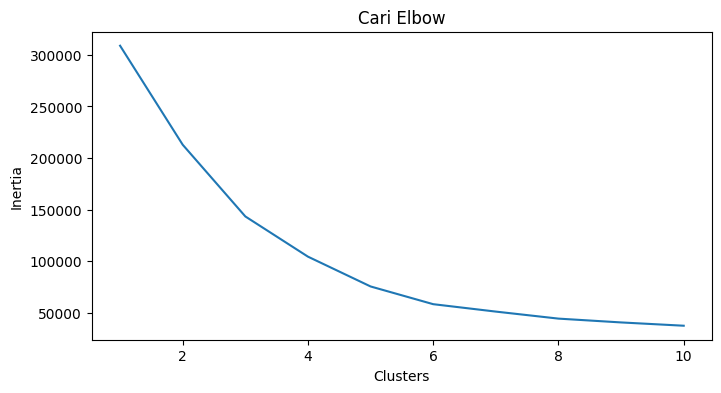

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Terakhir kita bisa melatih kembali K-Means dengan jumlah K yang didapat dari metode Elbow. Lalu kita bisa membuat plot hasil pengklasteran K-Means dengan menjalankan kode di bawah.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


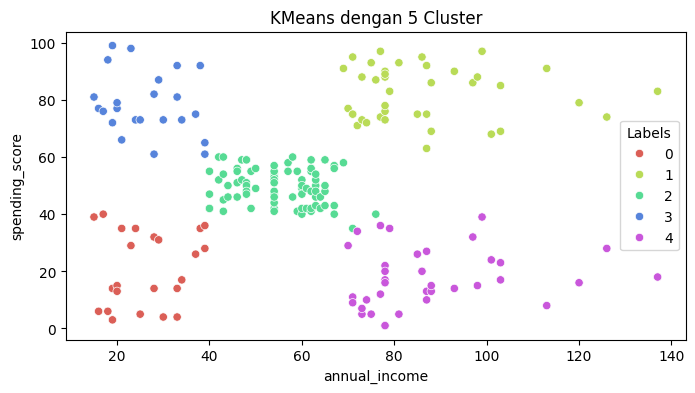

In [ ]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

## **PCA DENGAN SCIKITLEARN**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
atribut = iris.data
label = iris.target

# bagi dataset menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(
    atribut, label, test_size=0.2, random_state=1)


Kita akan menggunakan model Decision Tree dan menghitung berapa akurasinya tanpa menggunakan PCA. Akurasi tanpa PCA adalah 0.9666. Akurasi dari model Anda mungkin berbeda dengan keluaran di bawah.

In [ ]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(X_train, y_train)
model_pertama.score(X_test, y_test)

0.9666666666666667

Kemudian kita akan menggunakan PCA dan menghitung variance dari setiap atribut. Hasilnya adalah 1 atribut memiliki variance sebesar 0.922, yang berarti atribut tersebut menyimpan informasi yang tinggi dan jauh lebih signifikan dari atribut lain.



In [ ]:
from sklearn.decomposition import PCA

# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)

# mengaplikasikan PCA pada dataset
pca_atributes = pca.fit_transform(X_train)

# melihat variance dari setiap atribut
pca.explained_variance_ratio_


array([0.92848323, 0.04764372, 0.01931005, 0.004563  ])

Melihat dari variance sebelumnya kita bisa mengambil 2 principal component terbaik karena total variance nya adalah 0.976 yang sudah cukup tinggi.

In [ ]:
# PCA dengan 2 principal component
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)


Kita akan menguji akurasi dari classifier setelah menggunakan PCA.

In [ ]:
# uji akurasi classifier
model2 = decision_tree.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)


0.9333333333333333

Dari percobaan di atas bisa kita lihat bahwa dengan hanya 2 principal component atau 2 atribut saja model masih memiliki akurasi yang tinggi. Dengan principal component kamu bisa mengurangi atribut yang kurang signifikan dalam prediksi dan mempercepat waktu pelatihan sebuah model machine learning.

SyntaxError: invalid syntax (<ipython-input-7-0014a9cdfea5>, line 1)

## **LATIHAN SVM**

In [ ]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Kita lalu memisahkan antara atribut dan label pada dataframe. Untuk memisahkan kolom-kolom pada dataframe kamu bisa melihat dokumentasinya pada tautan ini.



In [ ]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]

# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

Jika kita lihat, nilai-nilai pada dataset memiliki skala yang berbeda. Contohnya pada kolom Glucose dan kolom Diabetes Pedigree Function. Kita perlu mengubah nilai-nilai dari setiap atribut berada pada skala yang sama. Kita dapat mencoba menggunakan standarisasi dengan fungsi StandardScaler() dari SKLearn.



In [ ]:
from sklearn.preprocessing import StandardScaler

# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [ ]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


Setelah atribut dan label dipisah, kita bisa memisahkan data untuk training dan testing menggunakan fungsi .train_test_split().

In [ ]:
from sklearn.model_selection import train_test_split

# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


Kita kemudian membuat objek Support Vector Classifier dan menampungnya pada variabel clf. Akhirnya kita sampai pada tahapan yang kita tunggu-tunggu, kita memanggil fungsi fit untuk melatih model.



In [ ]:
from sklearn.svm import SVC

# membuat objek SVC dan memanggil fungsi fit untuk melatih model

clf = SVC()

clf.fit(X_train,y_train)

SVC()

Terakhir, kita bisa melihat bagaimana akurasi prediksi dari model yang kita latih terhadap data testing.

In [ ]:
# Menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

0.7559055118110236

## **LATIHAN SVR**

**TUJUAN**

Setelah mengenal support vector regression, kita akan belajar menerapkan teknik tersebut ke dalam model ML dengan library SKLearn.



Tahapan pada latihan kali ini adalah sebagai berikut:

Ubah data menjadi Dataframe.

Pisahkan atribut dan label.


Latih model SVR.

Buat plot dari model.


In [ ]:
import pandas as pd

data = pd.read_csv('Salary_Data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
import numpy as np

In [ ]:
# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

# mengubah bentuk atribut
X = np.array(X)
X = X[:,np.newaxis]

In [ ]:
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model  = SVR(C=1000, gamma=0.05, kernel='rbf')

# melatih model dengan fungsi fit
model.fit(X,y)


SVR(C=1000, gamma=0.05)

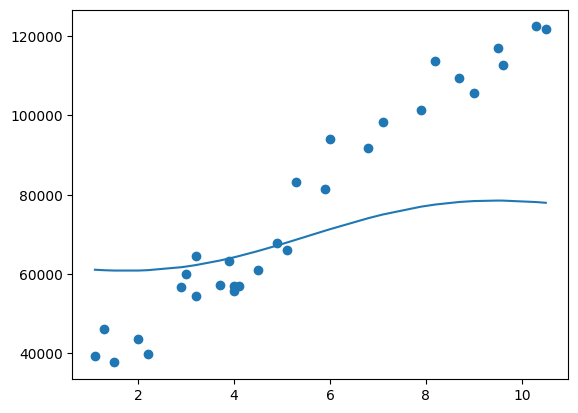

In [ ]:
import matplotlib.pyplot as plt

# memvisualisasikan model
plt.scatter(X, y)
plt.plot(X, model.predict(X))

## **GRID**

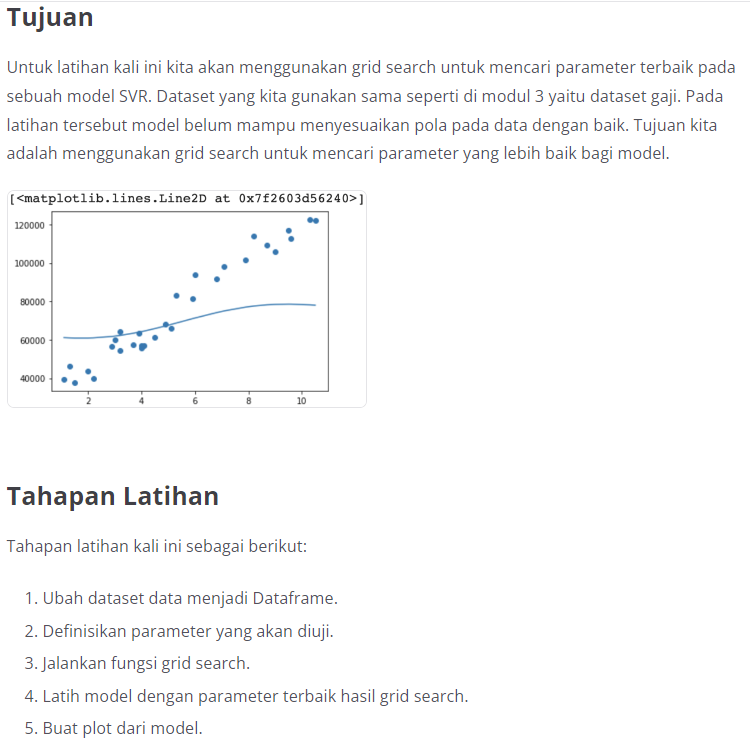

In [ ]:
import pandas as pd

data = pd.read_csv('Salary_Data.csv')

In [ ]:
data.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
print(data)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [ ]:
import numpy as np

# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

# mengubah bentuk atribut
X = np.array(X)
X = X.reshape(-1,1)

In [ ]:
print(X)


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


Selanjutnya, untuk menggunakan grid search, kita impor library GridSearchCV dari sklearn.model_selection. Lalu kita buat model yang ingin kita uji dengan grid search dalam hal ini model SVR. Kemudian kita buat sebuah python dictionary yang berisi nama parameter yang akan diuji, serta nilai-nilainya. Selanjutnya kita buat objek grid search dan mengisi parameter-parameternya. Parameter pertama adalah model yang akan kita uji. Parameter kedua adalah dictionary yang berisi kumpulan parameter dari model yang akan diuji. Terakhir kita panggil fungsi fit() pada objek grid search yang telah kita buat.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel

model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}

grid_search = GridSearchCV(model, parameters)

# melatih model dengan fungsi fit
grid_search.fit(X,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

Setelah grid search mencari parameter terbaik pada model, kita bisa menampilkan parameter terbaik dengan memanggil atribut best_params_ dari objek grid search.



In [ ]:
# menampilkan parameter terbaik dari objek grid_search
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


Selanjutnya Anda bisa mencoba membuat model SVM baru dengan parameter hasil grid search dan melatihnya pada data.



In [ ]:
# membuat model SVM baru dengan parameter terbaik hasil grid search
model_baru  = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)


SVR(C=100000, gamma=0.005)

Terakhir kita bisa memvisualisasikan SVR dengan parameter hasil grid search. Dapat dilihat dari hasil plot bahwa grid search berhasil mencari parameter yang lebih baik sehingga meningkatkan performa dari model.

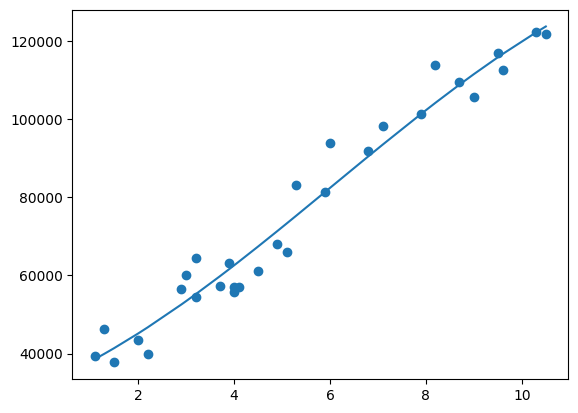

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))

## **MENAMBAHKAN DAN MENGURANGI FITUR**

Nah pada submodul ini kita akan membahas lebih lanjut mengenai feature engineering. Andrew Ng, seorang profesor kecerdasan buatan dari Stanford dan pencetus Google Brain mengatakan bahwa “Menciptakan fitur-fitur yang baik adalah pekerjaan yang sulit, memakan waktu, dan membutuhkan pengetahuan seorang pakar di bidang terkait. Machine learning terapan pada dasarnya adalah rekayasa fitur.”

Berdasarkan pernyataan dari Andrew maka dapat disimpulkan, bahwa tahap rekayasa fitur merupakan salah satu tahapan yang memakan banyak waktu. Jadi, rekayasa fitur itu pastinya penting ya.

Nah, di submodul ini Anda akan dikenalkan dengan beberapa teknik lain dalam rekayasa fitur yang sudah dibahas pada modul sebelumnya.

**Binning**

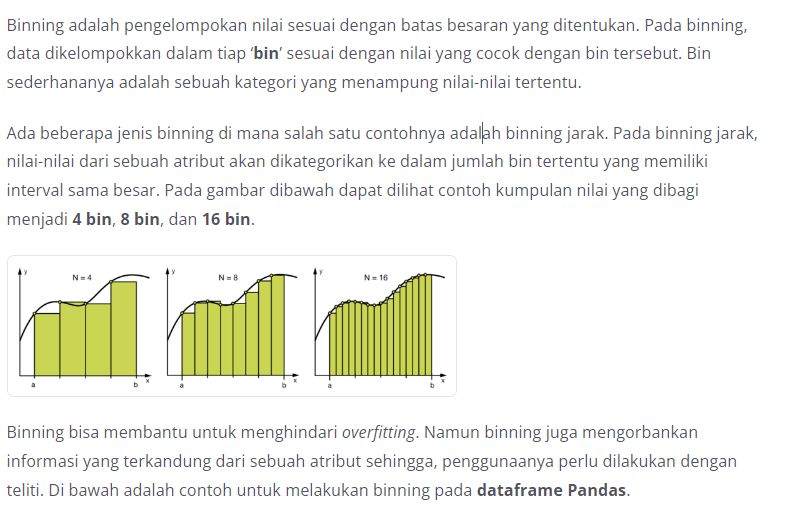

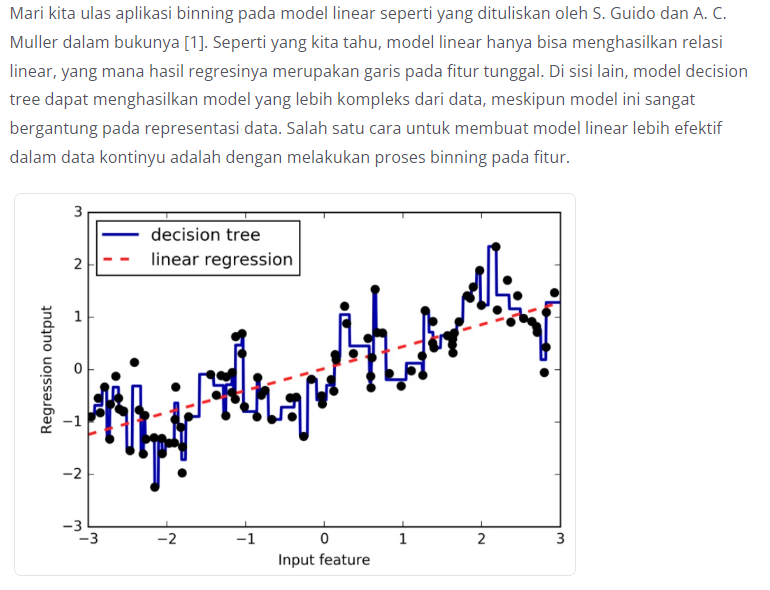

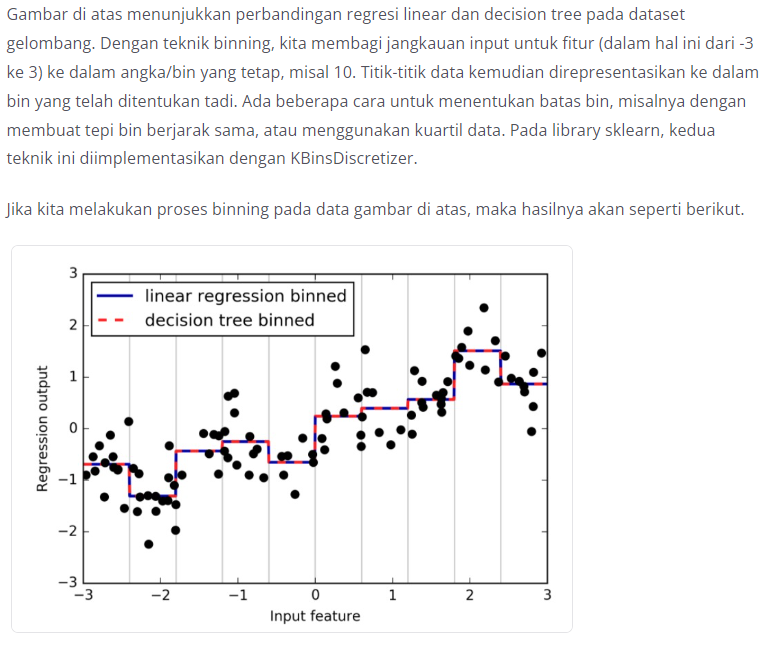

**Splitting**

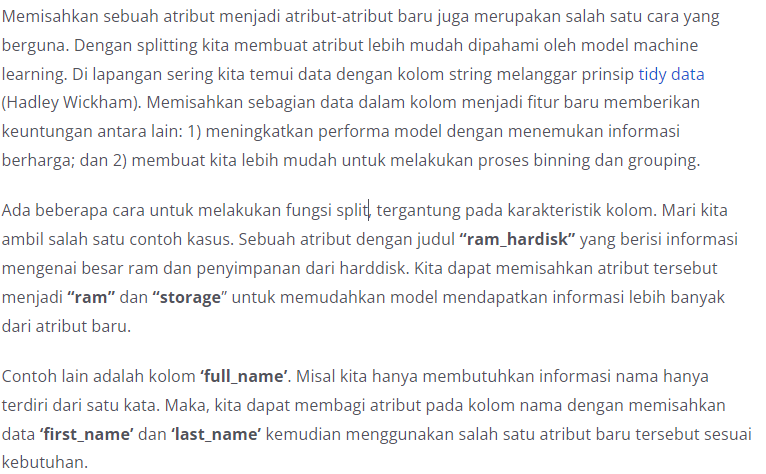

In [ ]:
import pandas as pd

Developer = pd.DataFrame({'Name': ['Isyana Saraswati', 'Nicholas Saputra', 'Raisa Andriana'],
        'Age':[30, 36, 32]})
print("Machine Learning Developer di Indonesia :\n", Developer)



Machine Learning Developer di Indonesia :
                Name  Age
0  Isyana Saraswati   30
1  Nicholas Saputra   36
2    Raisa Andriana   32


In [ ]:
Developer[['First','Last']] = Developer.Name.str.split(expand=True)
print("\n Split kolom 'Name', lalu tambahkan kedua kolom : \n", Developer)



 Split kolom 'Name', lalu tambahkan kedua kolom : 
                Name  Age     First       Last
0  Isyana Saraswati   30    Isyana  Saraswati
1  Nicholas Saputra   36  Nicholas    Saputra
2    Raisa Andriana   32     Raisa   Andriana


**Interaction feature**

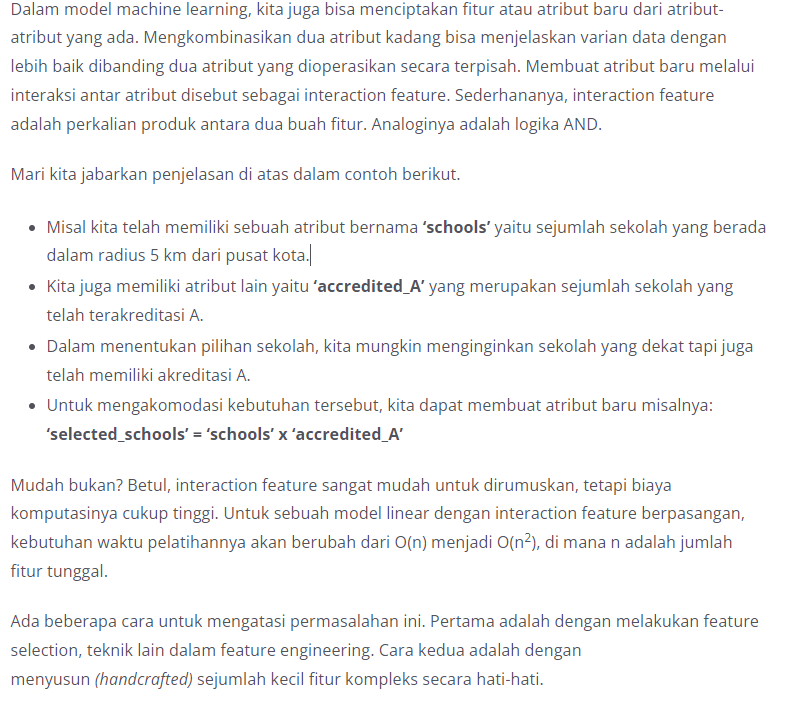